<a href="https://colab.research.google.com/github/factorLee/FastCampus/blob/main/ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network 실습

# 1. 데이터 불러오기, 및 Neural Network 적합

In [ ]:
X=[[0.,0.],[1.,1.]]
y=[[0,1],[1,1]] # [[y1,y2],[y1,y2]]


- 함수 불러오기

In [ ]:
from sklearn.neural_network import MLPClassifier # MLP: Multi Layer perceptron = 인공신경망

 - 모델 적합

In [ ]:
clf=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
# solver: 알고리즘을 통해 어떻게 해를 구할것인지 지정, alpha: neural network 모델을 간단하게 만드려면(과적합을 피하려면) 값을 크게 준다.
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf.predict([[2.,2.],[-1.,-2.]]) 

array([[1, 1],
       [0, 1]])

In [ ]:
clf.coefs_ # input~hidden-output layer 까지의 weight 5-2-2
# 구조를 확인할 수 있음

[array([[-0.15011367, -0.62860541, -0.90433213, -3.45938109, -0.63904618],
        [-0.73749132, -1.5947694 , -0.2793927 , -3.28854097,  0.0702225 ]]),
 array([[ 0.30838904, -0.14960207],
        [ 3.14928608, -0.65056811],
        [-0.54615798,  0.54407041],
        [ 4.36386369, -0.33753023],
        [ 0.34792663,  0.68091737]]),
 array([[-3.58233912,  2.68515229],
        [ 0.9049651 , -0.96123048]])]

In [ ]:
# 차원 확인
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 2)]

# 2. model의 복잡도에 따른 퍼포먼스 비교

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import  make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

- 설정할 parameter들을 입력. h는 시각화를 얼마나 자세하게 할 것인가에 대한 위한 임의의 값.

In [ ]:
h = .02 # 값이 커지면 픽셀이 커지는 느낌?
alphas=np.logspace(-5,3,5) # -5~3까지 5개를 가져와서 지수함수.
names=['alpha'+str(i) for i in alphas] # 

In [ ]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [ ]:
names

['alpha1e-05', 'alpha0.001', 'alpha0.1', 'alpha10.0', 'alpha1000.0']

In [ ]:
classifiers=[]
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1, hidden_layer_sizes=[100,100]))

# alpha와 hidden layer를 조절해주면서 test 데이터를 낮춰준다.

- 데이터 생성

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

In [ ]:
pd.DataFrame(X).head()

,0,1
0,-0.605416,1.296708
1,1.354900,-0.046877
2,1.780375,1.099858
3,1.436615,0.807641
4,0.721669,1.168160


In [ ]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,1
4,1


In [ ]:
rng=np.random.RandomState(2)
X +=2*rng.uniform(size=X.shape)
linearly_separable = (X,y)
# X에 약간의 에러를 더하는 작업

- 여러 모양의 추가 데이터셋 생성

In [ ]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1

<Figure size 1224x648 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

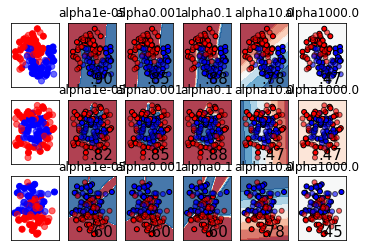

In [ ]:
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [ ]:
#오버피팅 된 부분 주의 하면서 살펴보기